In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import load_image, toGrey, index_row_in_array, is_row_in_array, imshow_components

In [205]:
image1 = toGrey(load_image('test/images/img_99a.jpg'))
# image2 = toGrey(load_image('test/images/img_99d.jpg'))
image2 = toGrey(load_image('test/images/img_32.jpg'))

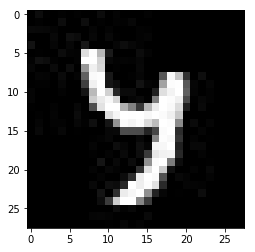

In [206]:
plt.imshow(image1.astype(np.uint8), cmap='gray')

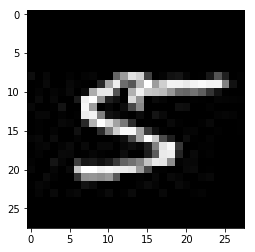

In [207]:
plt.imshow(image2.astype(np.uint8), cmap='gray')

In [214]:
y = image1.copy()
y_unique = np.unique(y)
y_unique_sorted  = np.sort(y_unique)
# y_unique

1


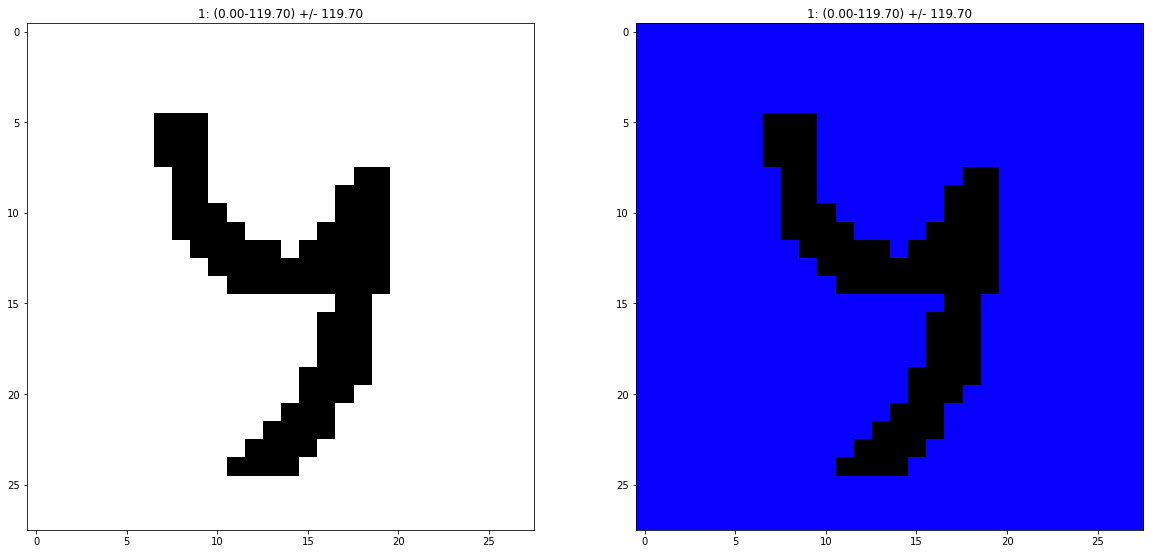

2


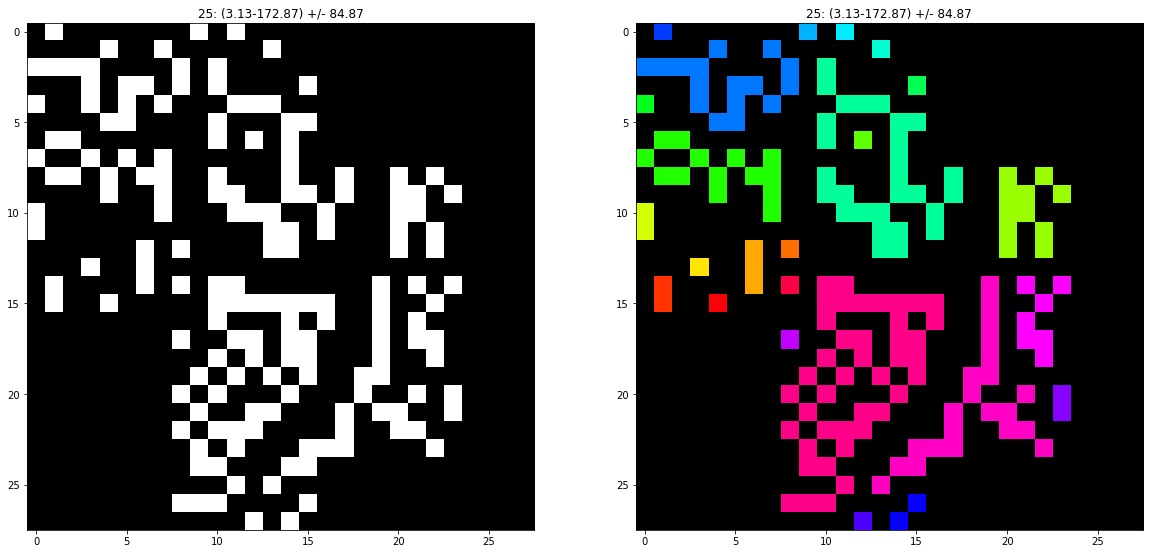

3


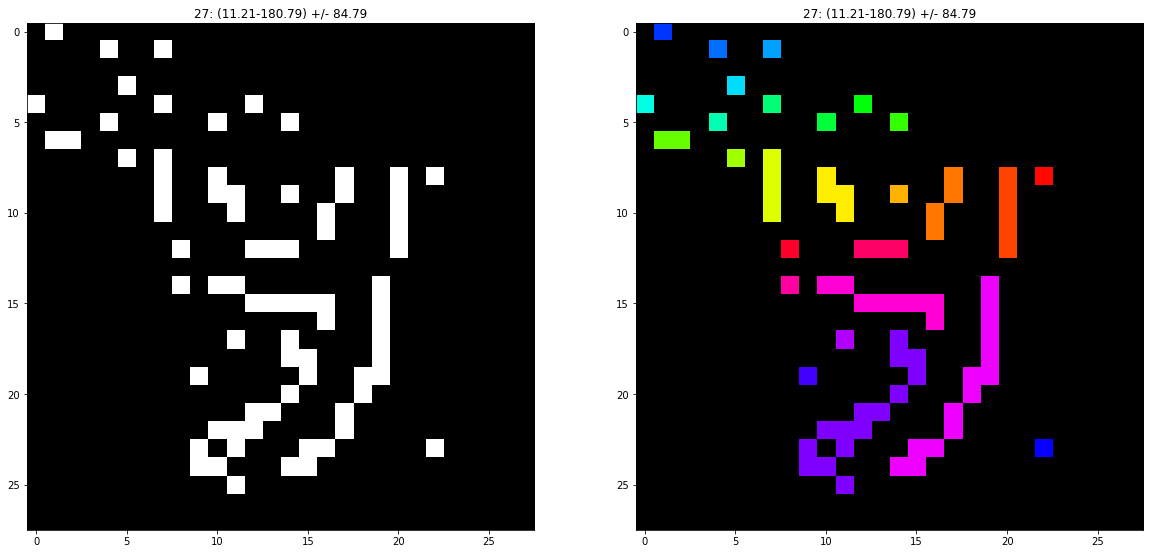

4


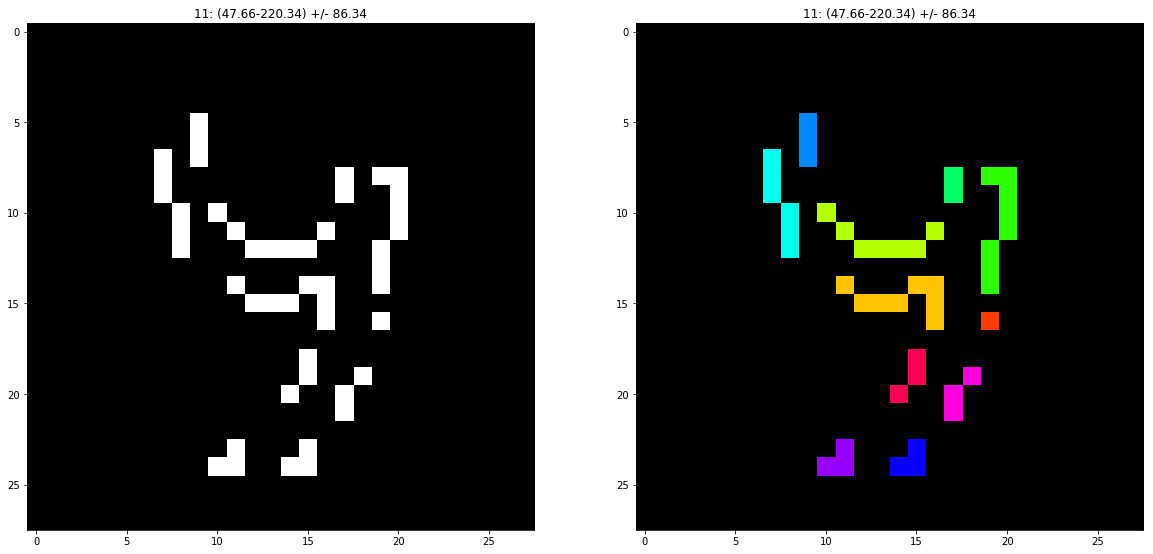

5


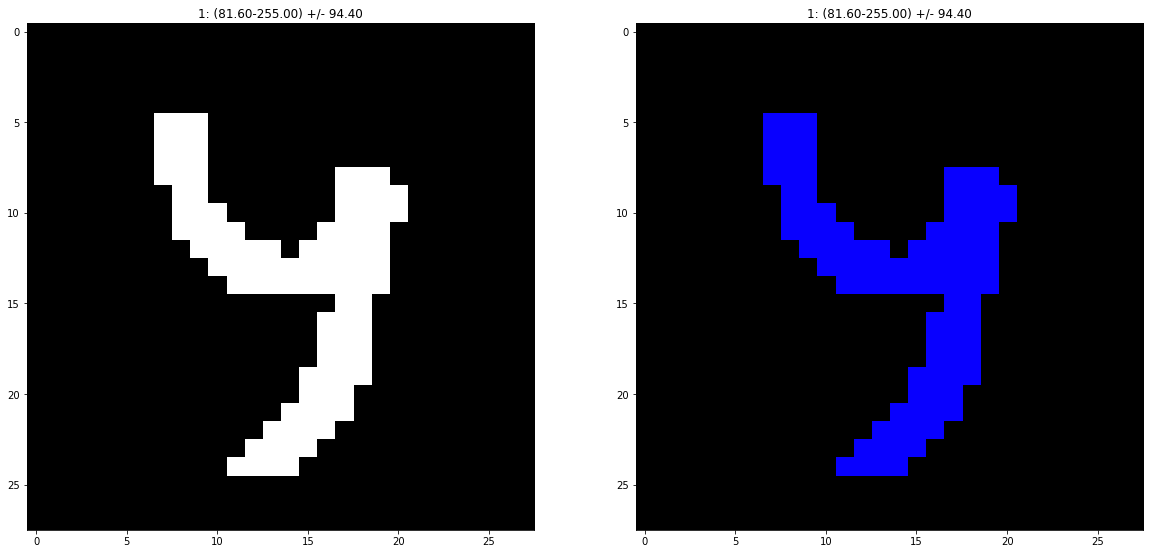

In [215]:
cls, cx = [], 0

for i in y_unique:
    m = np.sort(abs(i - y_unique).flatten()).mean()
    
    a = i - m;a = 0 if a < 0 else a
    b = i + m;b = 255 if b > 255 else b
    
    img = ((y >= a) & (y <= b)).astype(np.uint8)

    display = False
    if len(cls) == 0:
        cls = np.array([img], dtype=np.uint8)
        prev = img.copy()
        
        display = True
#         print(img, i, m, end=" new!\n\n")
        
    else:
        diff = abs(prev - img.astype(np.int8)).mean()
#         print(diff)
        if diff > 0.075 and (not is_row_in_array(img, cls)):
    #         print(img, i, m, end="\n\n")
            cls = np.concatenate((cls, [img]))
            prev = img.astype(np.int64).copy()
            display = True
    
    if display:      
        cx+=1
        
        fig=plt.figure(figsize=(20, 20))
        w, h, rows, columns = 10, 10, 1, 2
        
        ret, labels = cv2.connectedComponents(img)
        labeled_img = imshow_components(labels)
        
        li = [0, img, labeled_img]
        
        print(len(cls))
        for k in range(1, columns*rows +1):
            ax = fig.add_subplot(rows, columns, k)
            ax.set_title('{}: ({:.2f}-{:.2f}) +/- {:.2f}'.format(np.amax(labels), a, b, m))
            
            if k == 2:
                img1 = li[k]
                plt.imshow(li[k])
                
            if k == 1:
                img1 = np.zeros(tuple(list(img.shape)+[3]))
                for i in range(3):
                    img1[:,:,i] = 255*img
                plt.imshow(li[k], cmap='gray')
                
                cv2.imwrite('dump/{}-{}.png'.format(len(cls), k), img1)
        plt.show()
          
    
#     if cx == 1: break

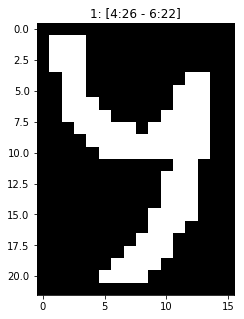

In [216]:
for label in range(1, ret):
    pos = np.where(labels == label)
    arx, ary = pos
    w, h = labels.shape

    arxs, arxe = min(arx), max(arx)
    arys, arye = min(ary), max(ary)

    xspan = abs(arxs - arxe)
    yspan = abs(arys - arye)

    xcenter, ycenter = (0.5 * abs(arxs + arxe)), (0.5 * abs(arys + arye))

    x1, x2 = xcenter - (0.5*xspan), xcenter + (0.5*xspan)
    y1, y2 = ycenter - (0.5*yspan), ycenter + (0.5*yspan)

    x1, x2, y1, y2 = list(map(int, [x1, x2, y1, y2]))
    
    x1 = 0 if x1 - 1 < 0 else x1 - 1
    y1 = 0 if y1 - 1 < 0 else y1 - 1

    x2 = w if x2 + 2 > w else x2 + 2
    y2 = h if y2 + 2 > h else y2 + 2
    
    fig=plt.figure(figsize=(5, 5))
    w, h, rows, columns = 10, 10, 1, 1

    li = [0, img]

    for k in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, k)
        ax.set_title('{}: [{}:{} - {}:{}]'.format(label, x1, x2, y1, y2))

    plt.imshow(img[x1:x2, y1:y2], cmap='gray')
    plt.show()

In [189]:
# img_objx = img[x1:x2, y1:y2]
# x, y = img_objx.shape

# img_1 = np.zeros((24, 24))
# img_1[0:x, 0:y] = img_objx

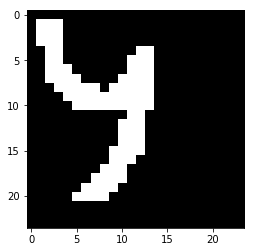

In [190]:
plt.imshow(img_1, cmap='gray')

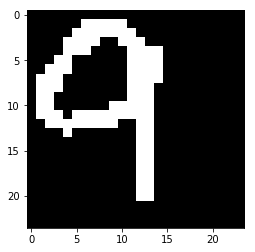

In [191]:
plt.imshow(img_2, cmap='gray')

In [217]:
img_1a, img_1b = np.where(img_1 == 1)
img_1a = int(img_1a.mean())
img_1b = int(img_1b.mean())

img_1.shape, img_1a, img_1b

((24, 24), 9, 7)

In [218]:
img_2a, img_2b = np.where(img_2 == 1)
img_2a = int(img_2a.mean())
img_2b = int(img_2b.mean())

img_2.shape, img_2a, img_2b

((24, 24), 8, 8)

In [219]:
d, f = img_1.shape
g, h = img_2.shape

if img_1a <= img_2a:
    img_1x1 = img_2a - img_1a
    img_1x2 = img_1x1 + d
    
    img_2x1, img_2x2 = 0, g
    
else:
    img_2x1 = img_1a - img_2a
    img_2x2 = img_2x1 + g
    
    img_1x1, img_1x2 = 0, d
    

if img_1b <= img_2b:
    img_1y1 = img_2b - img_1b
    img_1y2 = img_1y1 + f
    
    img_2y1, img_2y2 = 0, h
    
else:
    img_2y1 = img_1b - img_2b
    img_2y2 = img_2y1 + h
    
    img_1y1, img_1y2 = 0, f
    
r = max((img_1x2, img_2x2))
c = max((img_1y2, img_2y2))

img_1x1,img_1x2, img_1y1,img_1y2, '=>', img_2x1, img_2x2, img_2y1, img_2y2

(0, 24, 1, 25, '=>', 1, 25, 0, 24)

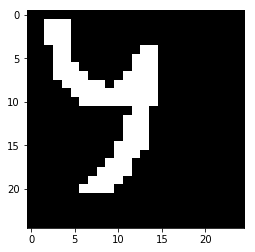

In [220]:
img_n1 = np.zeros((r, c))
img_n1[img_1x1:img_1x2, img_1y1:img_1y2] = img_1
plt.imshow(img_n1, cmap='gray')

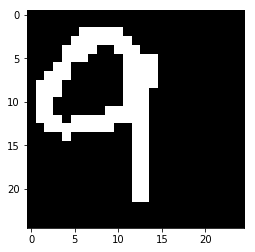

In [221]:
img_n2 = np.zeros((r, c))
img_n2[img_2x1:img_2x2, img_2y1:img_2y2] = img_2
plt.imshow(img_n2, cmap='gray')

In [222]:
abs(img_n2 - img_n1).sum(), 1 - abs(img_n2 - img_n1).mean()

(121.0, 0.8064)

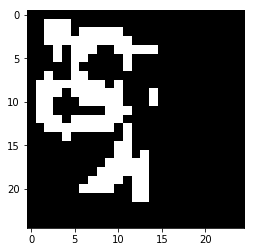

In [223]:
plt.imshow(abs(img_n2 - img_n1).astype(np.uint8), cmap='gray')

In [136]:
105, 0.13392857142857142

(105, 0.13392857142857142)

In [137]:
162, 0.2066326530612245

(162, 0.2066326530612245)